# Assignment - Step 1

### EDA - Exploratory Data Analysis of Data

In [3]:
#imports
import numpy as np
import pandas as pd
from sklearn import preprocessing

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [5]:
#Load the dataset:
df = pd.read_csv ('group_2.csv')
df

,duration_1,duration_2,duration_3,duration_4,duration_5,loudness_level,popularity_level,tempo_class,time_signature,key_mode,...,is_instrumental,is_dance_hit,temp_zscore,resonance_factor,timbre_index,echo_constant,distorted_movement,signal_power,target_class,target_regression
0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,0.221824,0.767388,...,0.0,0.0,-0.905245,-1.980572,0.173606,1,-0.857433,0.524,class_31,2.275790
1,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,0.221824,0.767388,...,0.0,0.0,-0.739191,-1.054986,0.354575,1,-1.727539,0.716,class_31,2.275790
2,0.0,1.0,0.0,0.0,0.0,1.0,4.0,1.0,0.221824,-0.104926,...,0.0,0.0,-0.905178,-0.587028,0.753432,1,-0.102572,0.597,class_31,2.051623
3,0.0,0.0,0.0,1.0,0.0,3.0,4.0,1.0,0.221824,0.457857,...,0.0,0.0,0.196552,0.149669,0.484375,1,-0.684564,0.965,class_31,2.903456
4,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.221824,-0.076786,...,0.0,0.0,-0.670542,1.024162,0.319093,1,-0.396449,0.667,class_31,1.558457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,0.221824,1.048779,...,0.0,0.0,0.829977,-0.431444,0.713162,1,0.617714,0.974,class_108,0.123792
2996,0.0,1.0,0.0,0.0,0.0,2.0,3.0,1.0,0.221824,-1.483743,...,0.0,0.0,1.161284,1.679747,0.528833,1,0.928878,0.635,class_108,0.123792
2997,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.221824,-0.076786,...,0.0,0.0,-0.575973,0.636232,0.645590,1,-0.609654,0.709,class_108,0.078959
2998,0.0,0.0,1.0,0.0,0.0,2.0,3.0,1.0,0.221824,1.048779,...,0.0,0.0,0.815700,0.810224,0.263591,1,1.643402,0.759,class_108,0.123792


In [4]:
#print the first 10 lines of the dataset:
df.head(10)


,duration_1,duration_2,duration_3,duration_4,duration_5,loudness_level,popularity_level,tempo_class,time_signature,key_mode,...,is_instrumental,is_dance_hit,temp_zscore,resonance_factor,timbre_index,echo_constant,distorted_movement,signal_power,target_class,target_regression
0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,0.221824,0.767388,...,0.0,0.0,-0.905245,-1.980572,0.173606,1,-0.857433,0.524,class_31,2.275790
1,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,0.221824,0.767388,...,0.0,0.0,-0.739191,-1.054986,0.354575,1,-1.727539,0.716,class_31,2.275790
2,0.0,1.0,0.0,0.0,0.0,1.0,4.0,1.0,0.221824,-0.104926,...,0.0,0.0,-0.905178,-0.587028,0.753432,1,-0.102572,0.597,class_31,2.051623
3,0.0,0.0,0.0,1.0,0.0,3.0,4.0,1.0,0.221824,0.457857,...,0.0,0.0,0.196552,0.149669,0.484375,1,-0.684564,0.965,class_31,2.903456
4,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.221824,-0.076786,...,0.0,0.0,-0.670542,1.024162,0.319093,1,-0.396449,0.667,class_31,1.558457
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.221824,1.611562,...,0.0,0.0,1.733731,0.694136,0.702616,1,-0.920818,0.692,class_31,1.782624
6,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.221824,1.583423,...,0.0,0.0,0.760994,-1.179325,0.502726,1,0.197067,0.817,class_31,1.513624
7,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.221824,0.485996,...,0.0,0.0,-0.138257,-0.371712,0.606746,1,0.416034,0.341,class_31,1.558457
8,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.221824,-0.386317,...,0.0,0.0,-0.737690,0.076376,0.752858,1,0.335362,0.449,class_31,1.468791
9,0.0,0.0,1.0,0.0,0.0,3.0,4.0,1.0,0.221824,1.020640,...,0.0,0.0,-0.902943,-0.262207,0.230118,1,-0.384925,0.880,class_31,2.051623


In [9]:
#print the last 10 lines of the dataset
df.tail(6)

,duration_1,duration_2,duration_3,duration_4,duration_5,loudness_level,popularity_level,tempo_class,time_signature,key_mode,...,is_instrumental,is_dance_hit,temp_zscore,resonance_factor,timbre_index,echo_constant,distorted_movement,signal_power,target_class,target_regression
2994,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,0.221824,-1.230491,...,0.0,0.0,-1.538370,-1.794236,0.380919,1,1.228517,0.544,class_108,0.034126
2995,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,0.221824,1.048779,...,0.0,0.0,0.829977,-0.431444,0.713162,1,0.617714,0.974,class_108,0.123792
2996,0.0,1.0,0.0,0.0,0.0,2.0,3.0,1.0,0.221824,-1.483743,...,0.0,0.0,1.161284,1.679747,0.528833,1,0.928878,0.635,class_108,0.123792
2997,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.221824,-0.076786,...,0.0,0.0,-0.575973,0.636232,0.645590,1,-0.609654,0.709,class_108,0.078959
2998,0.0,0.0,1.0,0.0,0.0,2.0,3.0,1.0,0.221824,1.048779,...,0.0,0.0,0.815700,0.810224,0.263591,1,1.643402,0.759,class_108,0.123792
2999,0.0,0.0,1.0,0.0,0.0,3.0,4.0,1.0,0.221824,-0.076786,...,0.0,0.0,-0.405116,0.326853,0.310374,1,-0.794048,0.650,class_108,1.917123


In [5]:
#Information about dataset dimension
df.shape

(3000, 49)

### EDA
1. Descriptive statistics
2. Data Types and Missing Values
3. Univariate Analysis (Distribution of individual features)
4. Bivariate Analysis (Correlation between features and target variable)

#### Descriptive Statistics

In [6]:
#generate descriptive statistics of the numerical columns
df.describe()

,duration_1,duration_2,duration_3,duration_4,duration_5,loudness_level,popularity_level,tempo_class,time_signature,key_mode,...,loudness_yeo,is_instrumental,is_dance_hit,temp_zscore,resonance_factor,timbre_index,echo_constant,distorted_movement,signal_power,target_regression
count,3000.000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.0,3000.000000,3000.000000,3000.000000,3000.0,3000.000000,3000.000000,3000.000000
mean,0.028,0.105000,0.280333,0.583333,0.003333,1.638667,1.529333,1.020333,0.013790,0.052428,...,0.349837,0.136333,0.0,-0.045649,0.029259,0.495085,1.0,0.006895,0.767505,-0.192521
std,0.165,0.306605,0.449237,0.493089,0.057648,1.369938,1.049845,0.261934,1.037087,0.985932,...,0.748276,0.343199,0.0,0.850553,0.997143,0.287199,0.0,1.006760,0.199075,1.110196
min,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.712656,-1.511882,...,-2.572085,0.000000,0.0,-2.570050,-3.532818,0.000249,1.0,-3.266071,0.028800,-1.490205
25%,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.221824,-0.920961,...,-0.083143,0.000000,0.0,-0.638777,-0.626579,0.245971,1.0,-0.638466,0.663500,-0.997039
50%,0.000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.221824,0.176466,...,0.397081,0.000000,0.0,-0.040569,0.013797,0.495627,1.0,0.081821,0.807000,-0.728040
75%,0.000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,0.221824,1.020640,...,0.837262,0.000000,0.0,0.326913,0.696271,0.743523,1.0,0.756009,0.932000,0.661792
max,1.000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,3.000000,2.533318,1.611562,...,4.825222,1.000000,0.0,3.141817,4.202026,0.999766,1.0,2.346401,0.999000,2.903456


#### Data types and Missing Values

In [7]:
data_info = pd.DataFrame({
    'Data type': df.dtypes,
    'Missing Values': df.isna().sum(),  #confirmar se é isna() ou isnull()
    'Unique Values': df.nunique()
})

data_info

,Data type,Missing Values,Unique Values
duration_1,float64,0,2
duration_2,float64,0,2
duration_3,float64,0,2
duration_4,float64,0,2
duration_5,float64,0,2
loudness_level,float64,0,5
popularity_level,float64,0,5
tempo_class,float64,0,4
time_signature,float64,0,4
key_mode,float64,0,24


#### Univariate analysis

In [8]:
# Preparar o estilo de visualização
sns.set(style="whitegrid")

/var/folders/z6/6v11cl0x7hn937k69bgr0gl00000gn/T/ipykernel_73473/1016834749.py:17: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


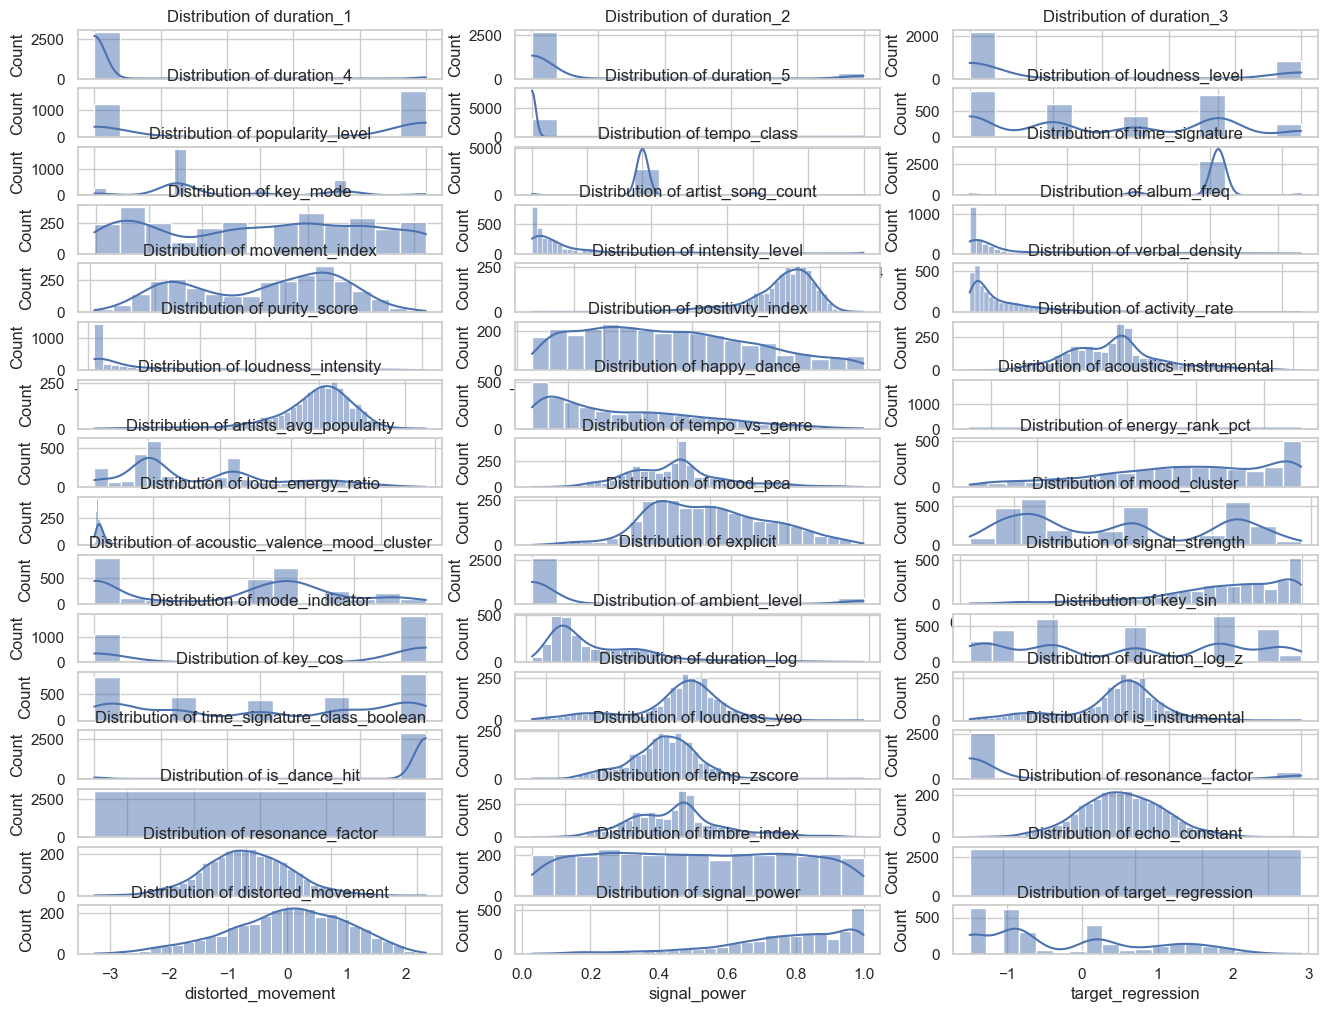

In [17]:
#Plot Histogram for numerical variables
n_columns = ['duration_1', 'duration_2', 'duration_3', 'duration_4', 'duration_5', 'loudness_level', 'popularity_level', 
             'tempo_class', 'time_signature', 'key_mode', 'artist_song_count', 'album_freq', 'movement_index', 'intensity_level', 
             'verbal_density', 'purity_score', 'positivity_index', 'activity_rate', 'loudness_intensity', 'happy_dance', 
             'acoustics_instrumental', 'artists_avg_popularity', 'tempo_vs_genre', 'energy_rank_pct', 'loud_energy_ratio', 'mood_pca',
             'mood_cluster', 'acoustic_valence_mood_cluster', 'explicit', 'signal_strength', 'mode_indicator', 'ambient_level', 'key_sin',
             'key_cos', 'duration_log', 'duration_log_z', 'time_signature_class_boolean', 'loudness_yeo', 'is_instrumental', 'is_dance_hit',
             'temp_zscore', 'resonance_factor', 'resonance_factor', 'timbre_index', 'echo_constant', 'distorted_movement', 'signal_power',
             'target_regression'
            ]
plt.figure(figsize=(16, 12))

for i, col in enumerate(n_columns, 1):
    plt.subplot(16, 3, i)
    sns.histplot(df[col], kde = True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()



Distribution of the categorcial variables (focus_factor, target_class)

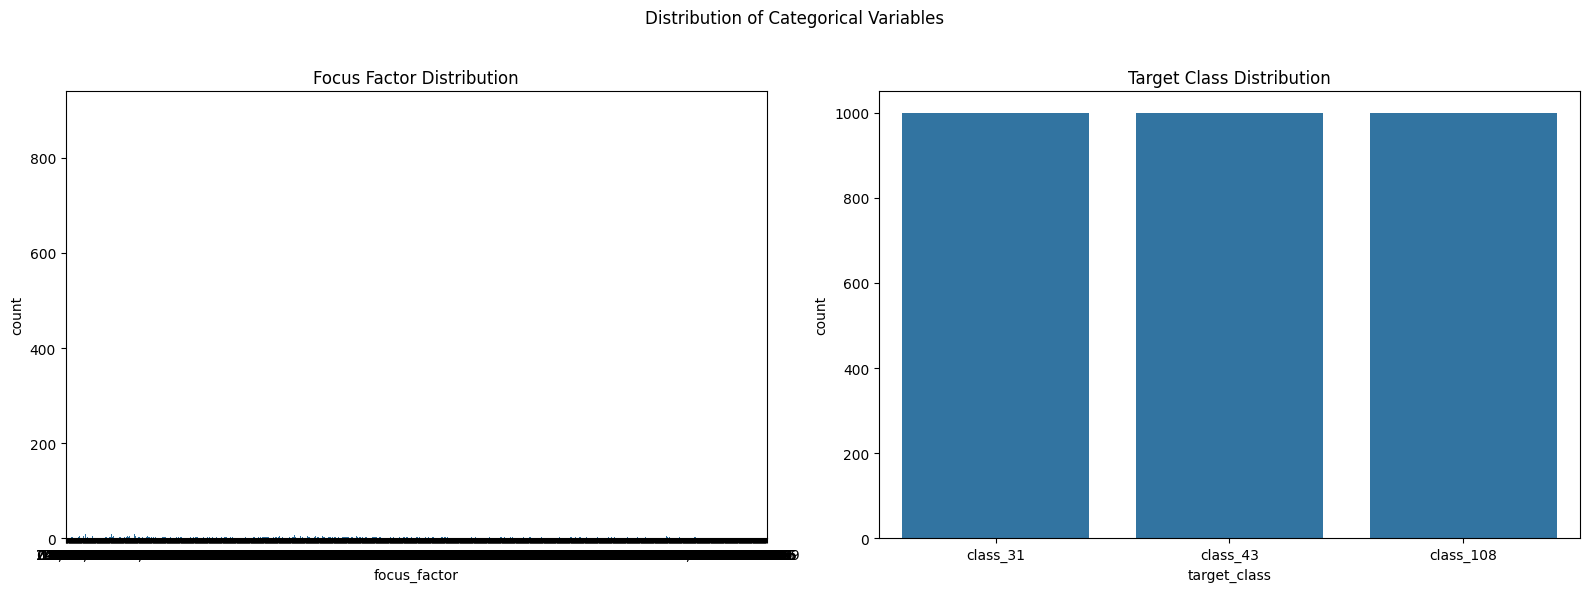

In [6]:
#Plot bar plots for categorical variables
fig, axes = plt.subplots(1, 2, figsize = (16, 6))
fig.suptitle('Distribution of Categorical Variables')

sns.countplot(x = 'focus_factor', data=df, ax=axes[0])
axes[0].set_title('Focus Factor Distribution')

sns.countplot(x = 'target_class', data=df, ax=axes[1])
axes[1].set_title('Target Class Distribution')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Bivariate Analysis

In [ ]:
# Plot scatter plots for numerical variables vs target regression
fig, axes = plt.subplots(1, 3, figsize=(18, 6))